# MALIGNANT COMMENTS CLASSIFIER

    The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.
    
    Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
    
    There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.    


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import regexp_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

## Training Data

### Train Data

In [3]:
train_df = pd.read_csv('malignant.train.csv')
train_df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
train_df.shape

(159571, 8)

In [5]:
train_df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

In [6]:
train_df.drop('id',axis=1,inplace=True)

In [7]:
train_df.isnull().sum()

comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   comment_text      159571 non-null  object
 1   malignant         159571 non-null  int64 
 2   highly_malignant  159571 non-null  int64 
 3   rude              159571 non-null  int64 
 4   threat            159571 non-null  int64 
 5   abuse             159571 non-null  int64 
 6   loathe            159571 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 8.5+ MB


In [9]:
train_df.columns.duplicated()

array([False, False, False, False, False, False, False])

### Data Visualization

In [10]:
train_df.malignant.value_counts()

0    144277
1     15294
Name: malignant, dtype: int64

<AxesSubplot:xlabel='malignant', ylabel='count'>

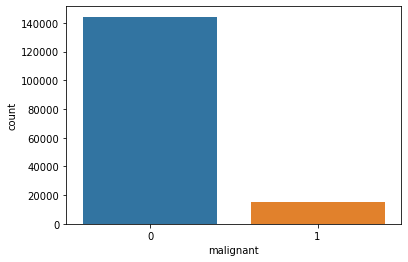

In [11]:
sns.countplot(x = 'malignant',data=train_df)

In [12]:
train_df.highly_malignant.value_counts()

0    157976
1      1595
Name: highly_malignant, dtype: int64

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

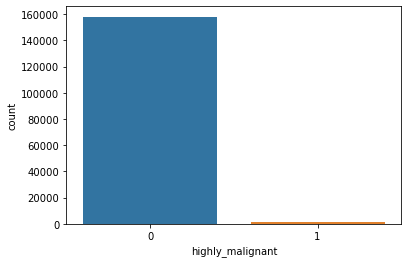

In [13]:
sns.countplot(x = 'highly_malignant',data = train_df)

In [14]:
train_df.rude.value_counts()

0    151122
1      8449
Name: rude, dtype: int64

<AxesSubplot:xlabel='rude', ylabel='count'>

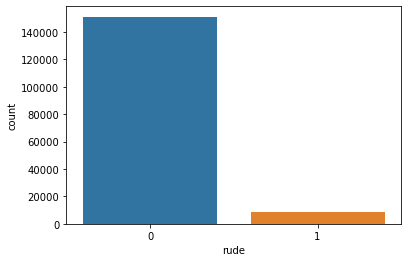

In [15]:
sns.countplot(x = 'rude',data = train_df)

In [16]:
train_df.threat.value_counts()

0    159093
1       478
Name: threat, dtype: int64

<AxesSubplot:xlabel='threat', ylabel='count'>

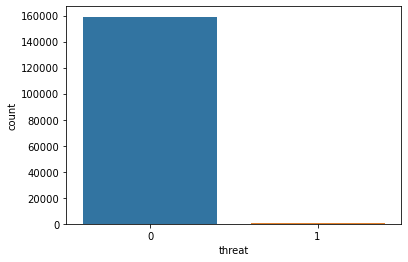

In [17]:
sns.countplot(x = 'threat',data = train_df)

In [18]:
train_df.abuse.value_counts()

0    151694
1      7877
Name: abuse, dtype: int64

<AxesSubplot:xlabel='abuse', ylabel='count'>

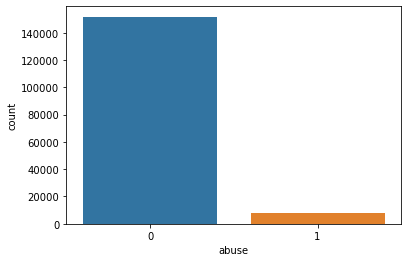

In [19]:
sns.countplot(x = 'abuse',data = train_df)

In [20]:
train_df.loathe.value_counts()

0    158166
1      1405
Name: loathe, dtype: int64

<AxesSubplot:xlabel='loathe', ylabel='count'>

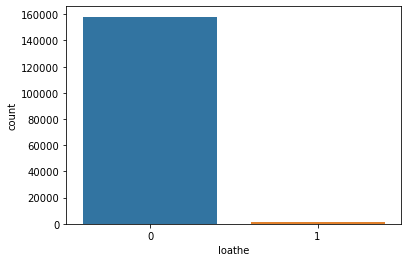

In [21]:
sns.countplot(x = 'loathe',data = train_df)

<AxesSubplot:ylabel='Count'>

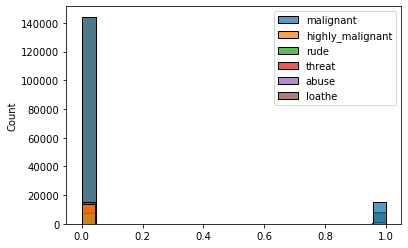

In [22]:
sns.histplot(train_df[train_df['malignant']==0])
sns.histplot(train_df[train_df['malignant']==1],color='red')

###### From above graph we can see that the number of malignant comment is highest than the other comments.

In [23]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=600,min_font_size=10,background_color='white')

In [24]:
hams = wc.generate(train_df[train_df['malignant']==1]['comment_text'].str.cat(sep=" "))

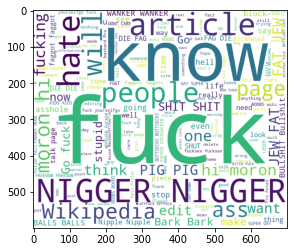

In [25]:
plt.imshow(hams)

In [26]:
hams = wc.generate(train_df[train_df['highly_malignant']==1]['comment_text'].str.cat(sep=" "))

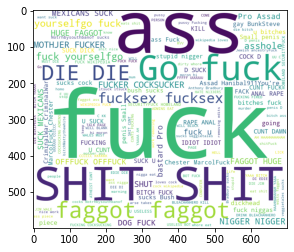

In [27]:
plt.imshow(hams)

In [28]:
hams = wc.generate(train_df[train_df['rude']==1]['comment_text'].str.cat(sep=" "))

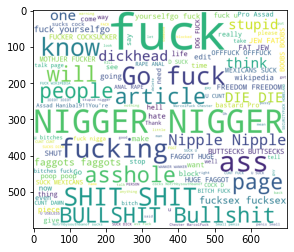

In [29]:
plt.imshow(hams)

In [30]:
hams = wc.generate(train_df[train_df['threat']==1]['comment_text'].str.cat(sep=" "))

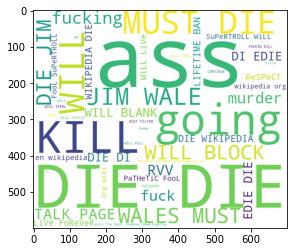

In [31]:
plt.imshow(hams)

In [32]:
hams = wc.generate(train_df[train_df['abuse']==1]['comment_text'].str.cat(sep=" "))

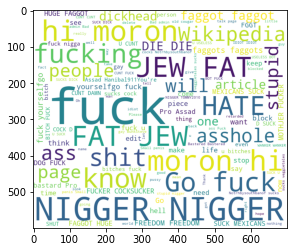

In [33]:
plt.imshow(hams)

In [34]:
hams = wc.generate(train_df[train_df['loathe']==1]['comment_text'].str.cat(sep=" "))

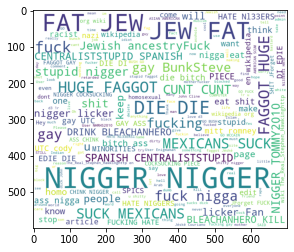

In [35]:
plt.imshow(hams)

### Data Preprocessing

In [36]:
import string
import re

In [37]:
comment = train_df['comment_text']

In [38]:
comment

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object

In [39]:
train_df['comment_text'] = comment.str.replace(r'[^A-Za-z ]','',regex=True)
train_df['comment_text']

0         ExplanationWhy the edits made under my usernam...
1         Daww He matches this background colour Im seem...
2         Hey man Im really not trying to edit war Its j...
3         MoreI cant make any real suggestions on improv...
4         You sir are my hero Any chance you remember wh...
                                ...                        
159566    And for the second time of asking when your vi...
159567    You should be ashamed of yourself That is a ho...
159568    Spitzer Umm theres no actual article for prost...
159569    And it looks like it was actually you who put ...
159570    And  I really dont think you understand  I cam...
Name: comment_text, Length: 159571, dtype: object

In [40]:
train_df['comment_text'] = train_df['comment_text'].str.lower()

In [41]:
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,explanationwhy the edits made under my usernam...,0,0,0,0,0,0
1,daww he matches this background colour im seem...,0,0,0,0,0,0
2,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,morei cant make any real suggestions on improv...,0,0,0,0,0,0
4,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,you should be ashamed of yourself that is a ho...,0,0,0,0,0,0
159568,spitzer umm theres no actual article for prost...,0,0,0,0,0,0
159569,and it looks like it was actually you who put ...,0,0,0,0,0,0


### Removing Stopwords

In [42]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:
stop_words = stopwords.words('english')

In [44]:
def remove_stopwords(text):
      new_text = []
      for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
              new_text.append(word)

        a = new_text[:]
        new_text.clear()
        return" ".join(a)

In [45]:
train_df['comment_text'].apply(remove_stopwords)

0         explanationwhy
1                   daww
2                    hey
3                  morei
4                       
               ...      
159566                  
159567                  
159568           spitzer
159569                  
159570                  
Name: comment_text, Length: 159571, dtype: object

### Correlation

In [46]:
train_df.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


<AxesSubplot:>

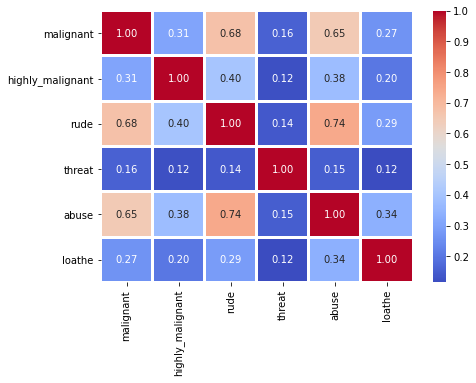

In [47]:
plt.figure(figsize=(7,5))
sns.heatmap(train_df.corr(),annot=True,fmt='.2f',linewidths=2,cmap='coolwarm')

###### Above graph shows the correlation between the variables.

## Test Data

In [48]:
test_df = pd.read_csv('malignant.test.csv')
test_df

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [49]:
test_df.shape

(153164, 2)

In [50]:
test_df.columns

Index(['id', 'comment_text'], dtype='object')

In [51]:
test_df.isnull().sum()

id              0
comment_text    0
dtype: int64

In [52]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [53]:
test_df.columns.duplicated()

array([False, False])

In [54]:
test_df.drop('id',axis=1,inplace=True)

In [55]:
text = test_df['comment_text']

In [56]:
test_df['comment_text'] = text.str.replace(r'[^A-Za-z ]','',regex=True)
test_df

,comment_text
0,Yo bitch Ja Rule is more succesful then youll ...
1,From RfC The title is fine as it is IMO
2,Sources Zawe Ashton on Lapland
3,If you have a look back at the source the info...
4,I dont anonymously edit articles at all
...,...
153159,i totally agree this stuff is nothing but to...
153160,Throw from out field to home plate Does it ...
153161,Okinotorishima categories I see your chan...
153162,One of the founding nations of the EU Germ...


In [57]:
test_df['comment_text'] = test_df['comment_text'].str.lower()

In [58]:
test_df

,comment_text
0,yo bitch ja rule is more succesful then youll ...
1,from rfc the title is fine as it is imo
2,sources zawe ashton on lapland
3,if you have a look back at the source the info...
4,i dont anonymously edit articles at all
...,...
153159,i totally agree this stuff is nothing but to...
153160,throw from out field to home plate does it ...
153161,okinotorishima categories i see your chan...
153162,one of the founding nations of the eu germ...


In [59]:
def remove_stopwords(text):
      new_text = []
      for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
              new_text.append(word)

        a = new_text[:]
        new_text.clear()
        return" ".join(a)

In [60]:
test_df['comment_text'].apply(remove_stopwords)

0                     yo
1                       
2                sources
3                       
4                       
               ...      
153159                  
153160             throw
153161    okinotorishima
153162               one
153163              stop
Name: comment_text, Length: 153164, dtype: object

### Data Conversion

In [61]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [62]:
train_df['comment_text'] = encoder.fit_transform(train_df['comment_text'])

In [63]:
train_df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,48284,0,0,0,0,0,0
1,42275,0,0,0,0,0,0
2,58305,0,0,0,0,0,0
3,92043,0,0,0,0,0,0
4,156344,0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,28991,0,0,0,0,0,0
159567,156248,0,0,0,0,0,0
159568,120637,0,0,0,0,0,0
159569,29305,0,0,0,0,0,0


### Splitting Data into x and y

In [64]:
x = train_df.drop(['malignant'],axis=1,inplace=True)

In [67]:
train_df

,comment_text,highly_malignant,rude,threat,abuse,loathe
0,48284,0,0,0,0,0
1,42275,0,0,0,0,0
2,58305,0,0,0,0,0
3,92043,0,0,0,0,0
4,156344,0,0,0,0,0
...,...,...,...,...,...,...
159566,28991,0,0,0,0,0
159567,156248,0,0,0,0,0
159568,120637,0,0,0,0,0
159569,29305,0,0,0,0,0
